**Employee Attrition Prediction System**

**Data Science Internship Project – Algonive**


**Domain:** Data Science

**Objective:** To predict whether an employee is likely to leave the organization using machine learning techniques based on HR analytics data.

In [81]:
#STEP 1: Load & Understand the Dataset

In [82]:

import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv")


In [84]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [85]:
df.shape


(1470, 35)

In [86]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [88]:
df['Attrition'].value_counts()


,count
Attrition,
No,1233
Yes,237


In [89]:
#STEP-2: DATA CLEANING & PREPROCESSING

In [90]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [91]:
#Converting target column (Attrition → numeric)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [92]:
df['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


In [93]:
#Dropping irrelevant columns
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [94]:
#Identifying categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [95]:
#Encoding categorical columns (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

In [96]:
#Final dataset shape check
df.shape

(1470, 46)

In [97]:
#STEP-3: FEATURE SELECTION & TRAIN-TEST SPLIT

In [98]:
#Separating Features and Target
# Input features (all columns except Attrition)
X = df.drop('Attrition', axis=1)

# Target variable
y = df['Attrition']

In [99]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

In [100]:
#Splitting Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [101]:
#Verifying Split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1176, 45)
Testing data shape: (294, 45)


In [102]:
#STEP-4: MODEL BUILDING (LOGISTIC REGRESSION)

In [103]:
#Importing model
from sklearn.linear_model import LogisticRegression

In [104]:
#Creating model object
model = LogisticRegression(max_iter=1000)

In [105]:
#Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [106]:
#FEATURE SCALING

In [107]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [108]:
#Scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#Training Logistic Regression again (scaled data)
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [110]:
#STEP-5: MODEL EVALUATION

In [111]:
#Making predictions
y_pred = model.predict(X_test_scaled)

In [112]:
#Accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8775510204081632


In [113]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



In [114]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[241,  14],
       [ 22,  17]])

In [115]:
#STEP-6: DATA VISUALIZATION

In [116]:
#Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

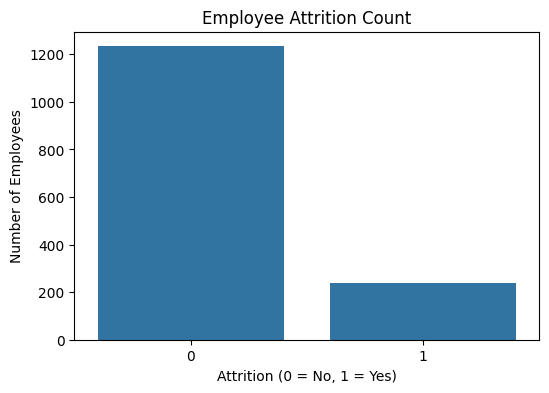

In [117]:
#Attrition count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.show()

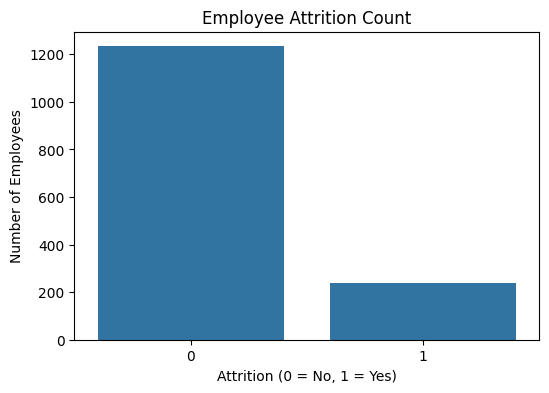

In [118]:
#Attrition count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.show()


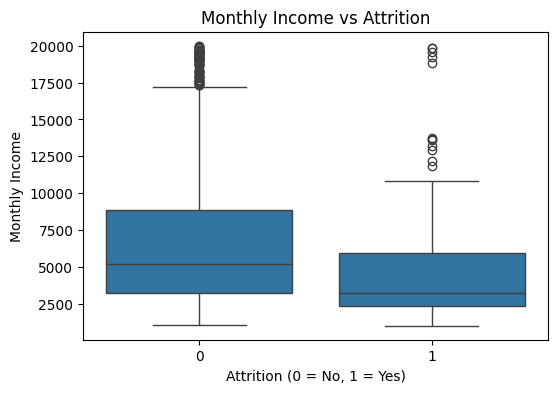

In [119]:
#Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()


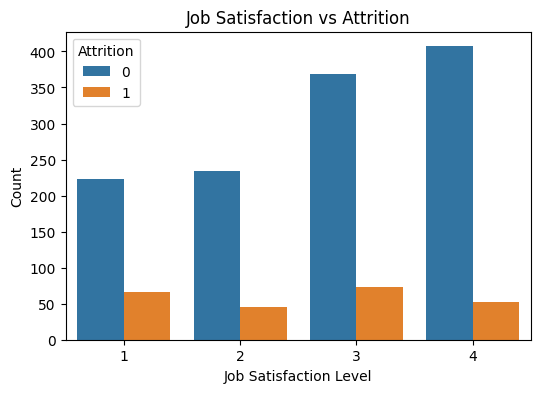

In [120]:
#Job Satisfaction vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()


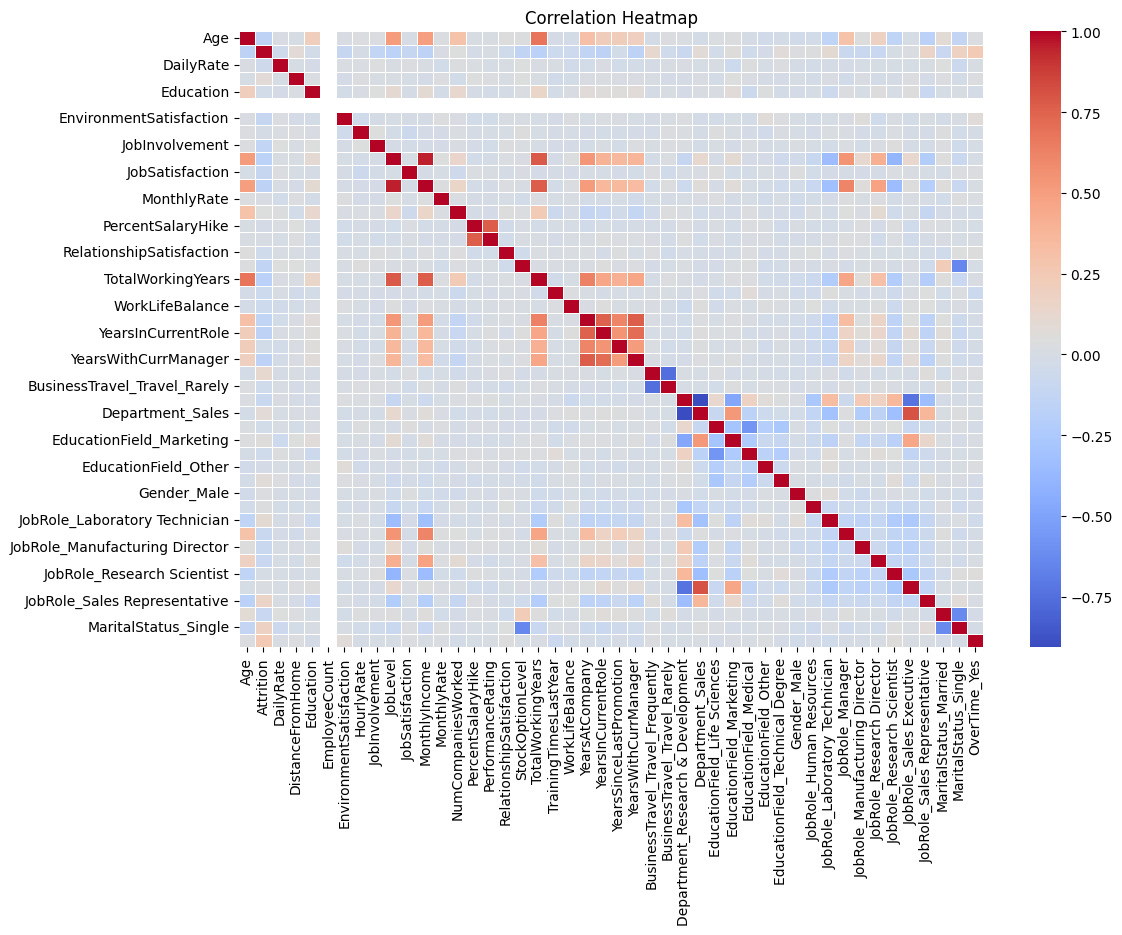

In [121]:
#Correlation heatmap (important)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
